In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import random

In [2]:
X,y = make_classification(n_features=5 , n_redundant=0 , n_informative=5 , n_clusters_per_class=1 )

In [3]:
df = pd.DataFrame(X , columns = ['col1','col2','col3','col4','col5'])
df['target'] = y

In [4]:
df.shape

(100, 6)

In [5]:
# function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]) , replace=True)

In [6]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1] , int(percent*df.shape[1]))
    new_df = df[cols]
    new_df['target'] = df['target']
    return df[cols]

In [7]:
# function for combined sampling
def combined_sampling(df,row_percent , col_percent):
    new_df = sample_rows(df,percent)
    return sample_features(new_df, new_df , col_percent)

In [8]:
df1 = sample_rows(df,0.1)
df2 = sample_rows(df,0.1)
df3 = sample_rows(df,0.1)

In [9]:
df1.iloc[:,:-1]

,col1,col2,col3,col4,col5
23,2.770916,1.069932,-0.927366,2.083577,-0.458173
89,0.847028,-1.409037,-1.274671,-0.285732,-1.622798
68,-0.596769,-1.642033,-1.956184,1.208490,2.943184
33,1.845849,-2.949481,-0.191669,0.550531,2.224258
60,0.065469,-3.647220,0.144472,-2.476738,0.055492
55,-0.162008,-1.912613,-0.470724,-2.269549,-1.920184
44,1.794021,0.789451,-2.709798,-0.906626,-3.119182
54,3.270695,-1.410465,-1.733240,3.309138,2.952409
24,0.516164,0.052779,-0.229405,0.620180,0.897885
72,1.673517,-3.507053,0.489007,-1.424414,-1.442745


In [10]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [11]:
clf1.fit(df1.iloc[:,:-1] , df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:-1] , df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:-1] , df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.132\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'x[2] <= 0.317\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

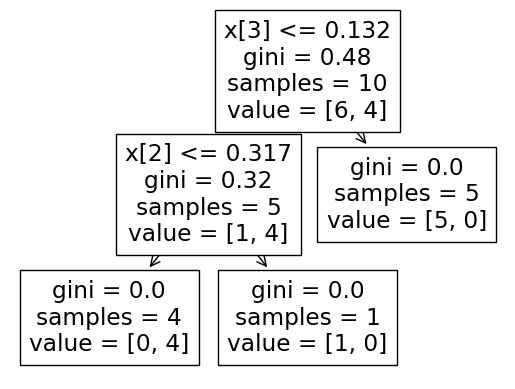

In [12]:
plot_tree(clf1)

In [13]:
clf1.predict(np.array([-0.528677,-0.168231,0.269472,-0.291045,0.051272]).reshape(1,5))

C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [14]:
clf2.predict(np.array([-0.528677,-0.168231,0.269472,-0.291045,0.051272]).reshape(1,5))

C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [15]:
clf3.predict(np.array([-0.528677,-0.168231,0.269472,-0.291045,0.051272]).reshape(1,5))

C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])